In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('/mnt/e/Term 4/HW/DIP-HW2/data/q4/a.png', cv2.IMREAD_GRAYSCALE)
print(image.shape)

(512, 512)


In [4]:
import numpy as np

def global_hist_eq(image, L=256):
    # Ensure the image is in uint8 format and values are within 0–255
    image = image.astype(np.uint8)

    # Compute the histogram (256 intensity levels)
    hist = np.bincount(image.ravel(), minlength=L)

    # Compute the PDF and CDF
    pdf = hist / image.size
    cdf = np.cumsum(pdf) * (L - 1)
    s = np.round(cdf).astype(np.uint8)

    # Map the intensity values using the transformation function
    out = s[image]

    return out


In [5]:
eq_image = global_hist_eq(image)

In [6]:
eq_image.shape

(512, 512)

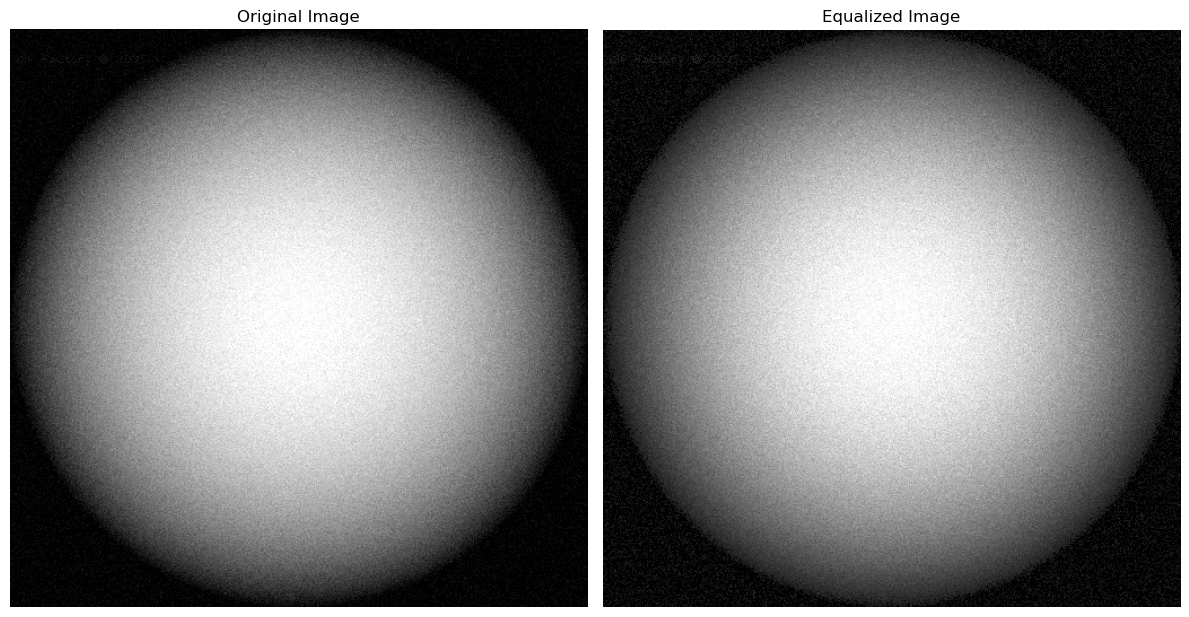

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eq_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

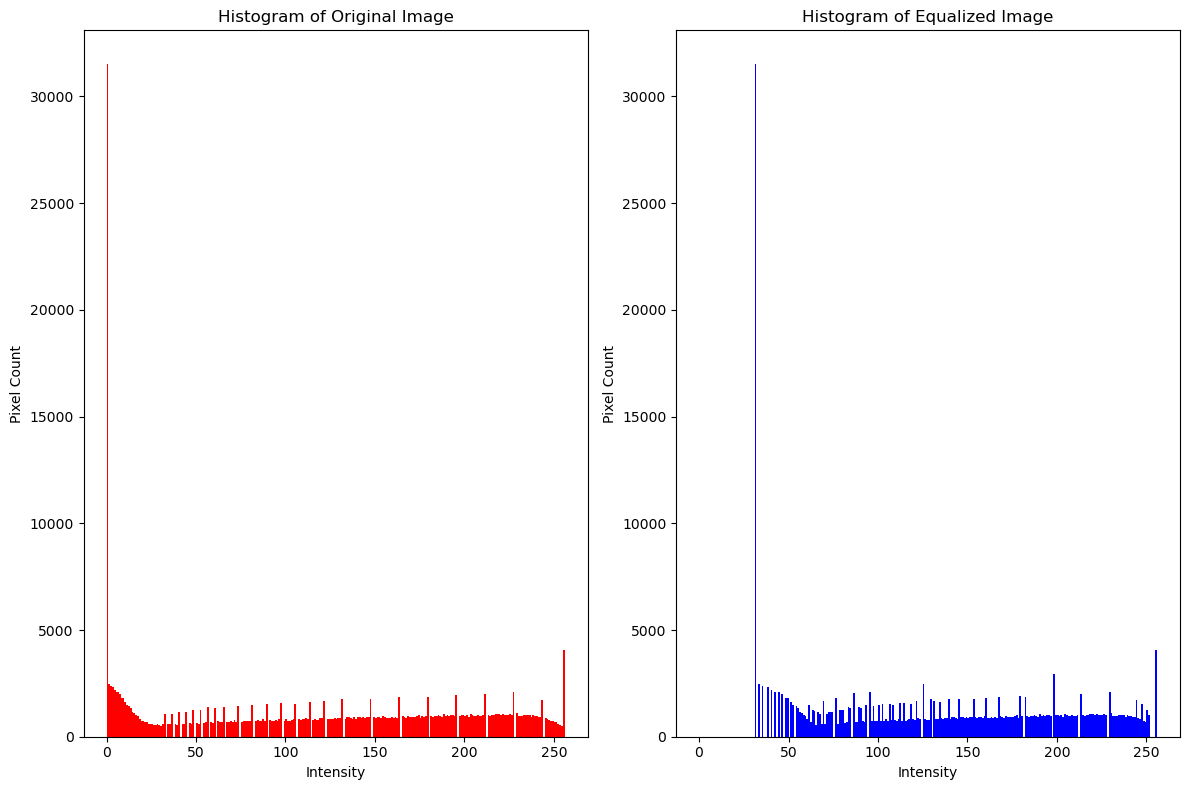

In [8]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, range=[0,256], color='red')
plt.title('Histogram of Original Image')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')

plt.subplot(1, 2, 2)
plt.hist(eq_image.ravel(), bins=256, range=[0,256], color='blue')
plt.title('Histogram of Equalized Image')
plt.xlabel('Intensity')
plt.ylabel('Pixel Count')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np

def local_hist_eq_simple(img, win_radius=7, L=256):
    """
    Very simple Local Histogram Equalization (no S_min) for 8-bit grayscale images.

    Parameters
    ----------
    img : np.ndarray
        2D uint8 grayscale image in range [0, 255].
    win_radius : int
        Half-size of the local window. Window size = (2*win_radius+1)^2.
    L : int
        Number of gray levels (256 for 8-bit).

    Returns
    -------
    np.ndarray
        Locally equalized image (uint8).
    """
    if img.ndim != 2:
        raise ValueError("Expected a 2D grayscale image.")
    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255).astype(np.uint8)

    H, W = img.shape
    out = np.empty_like(img)

    # Pad the image to handle borders
    r = int(win_radius)
    pad_img = np.pad(img, pad_width=r, mode='edge')

    for i in range(H):
        for j in range(W):
            # Extract local window
            win = pad_img[i : i + 2*r + 1, j : j + 2*r + 1]

            # Local histogram
            hist = np.bincount(win.ravel(), minlength=L)

            # Local CDF
            cdf = np.cumsum(hist) / win.size  # in [0,1]

            # Map the center pixel
            center_val = img[i, j]
            s = round(cdf[center_val] * (L - 1))
            s = max(0, min(L - 1, s))  # clamp
            out[i, j] = np.uint8(s)

    return out

In [10]:
local_eq_image = local_hist_eq_simple(image, win_radius=163)

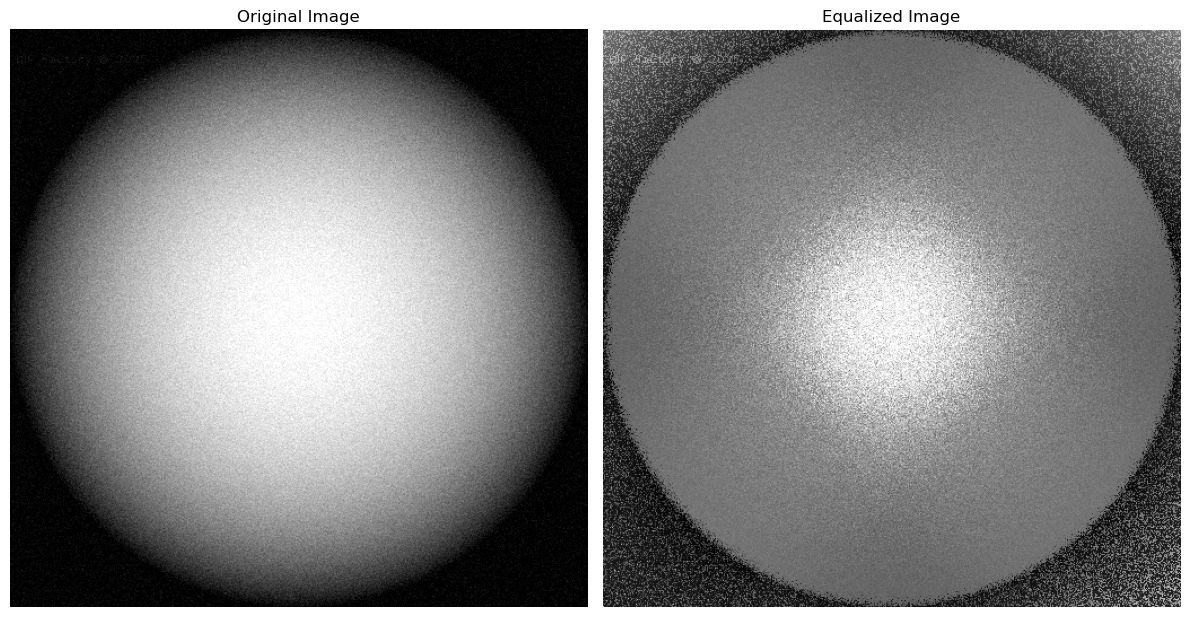

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(local_eq_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
patch = image[0:100, :130]

(-0.5, 129.5, 99.5, -0.5)

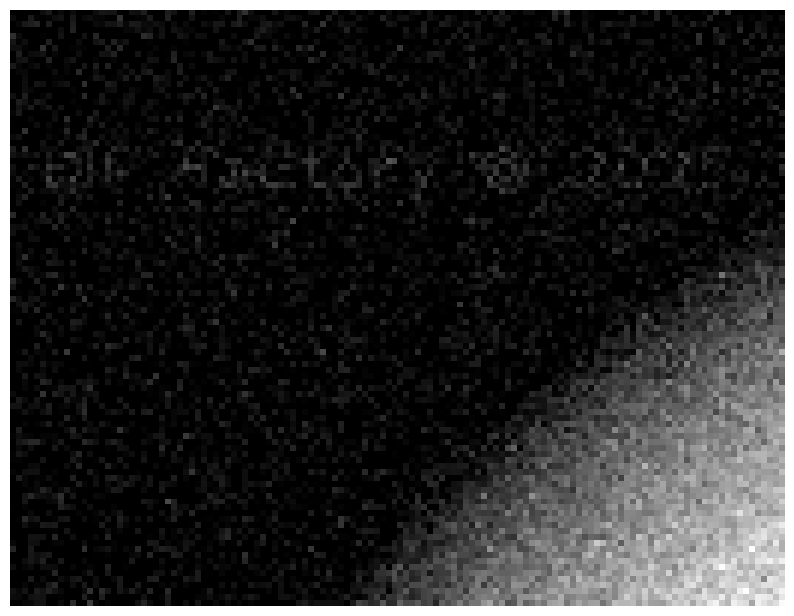

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(patch, cmap='grey')
plt.axis('off')

In [14]:
eq_patch = global_hist_eq(patch)

(-0.5, 129.5, 99.5, -0.5)

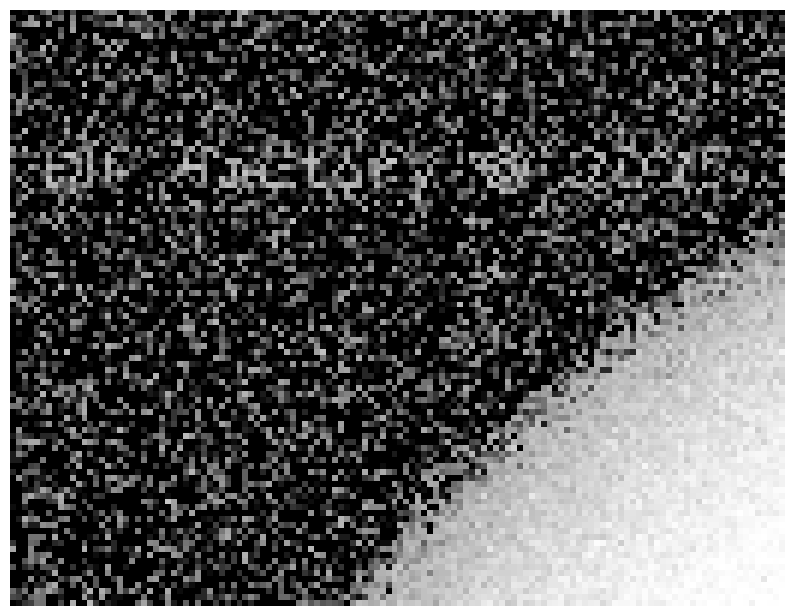

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(eq_patch, cmap='grey')
plt.axis('off')

(-0.5, 129.5, 99.5, -0.5)

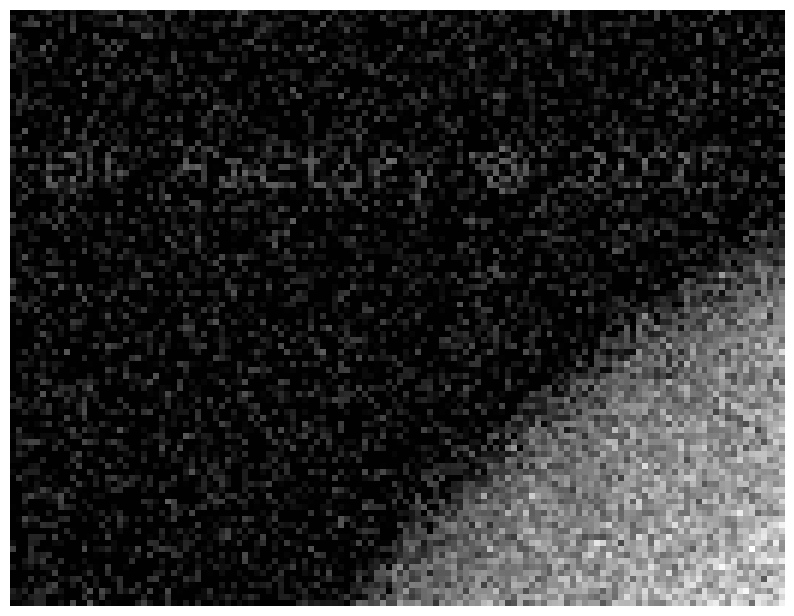

In [22]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(7, 7))
cl1 = clahe.apply(patch)

plt.figure(figsize=(10, 10))
plt.imshow(cl1, cmap='grey')
plt.axis('off')

In [26]:
patch = image[0:40, :130]

In [27]:
patch.min()

0

In [28]:
patch.max()

46

In [29]:
patch.mean()

4.4490384615384615

(-0.5, 511.5, 511.5, -0.5)

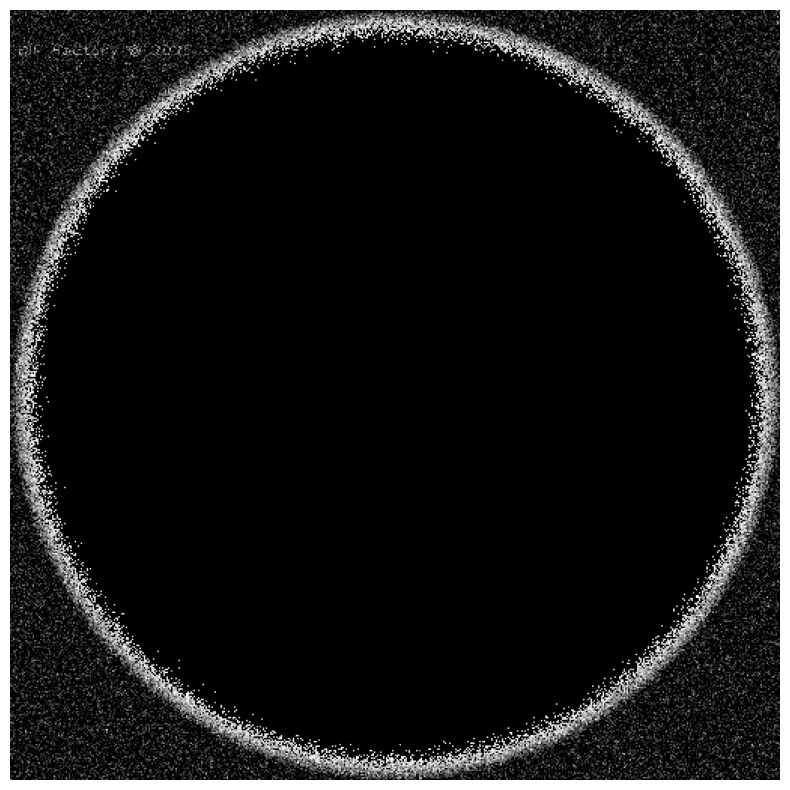

In [30]:
out = np.zeros_like(image)
mask = (image >= 0) & (image <= 45)
out[mask] = image[mask]

plt.figure(figsize=(10, 10))
plt.imshow(out, cmap='grey')
plt.axis('off')

In [31]:
eq = global_hist_eq(out)

(-0.5, 511.5, 511.5, -0.5)

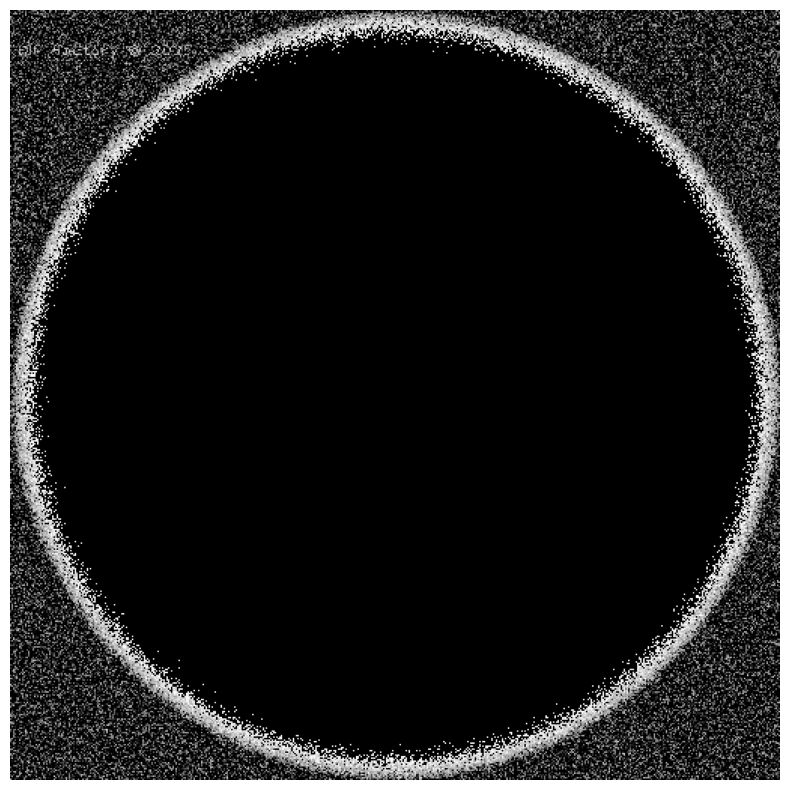

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(eq, cmap='grey')
plt.axis('off')